In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_data = pd.read_csv('https://raw.githubusercontent.com/jalajthanaki/credit-risk-modelling/master/data/cs-training.csv', index_col = 0)
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# **Understanding attributes of the dataset**

Bộ data này có 11 thuộc tính như sau


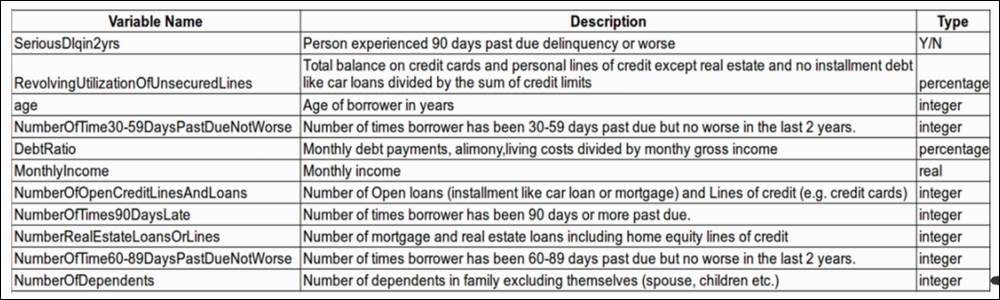

**1. SeriousDlqin2yrs**


*   Thuộc tính này để chỉ khách hàng có bị lần nào quá hạn trả nợ hàng tháng nhiều hơn 90 ngày trong 2 năm tới không. Giá trị của thuộc tính là Y (Yes) hoặc N (No)

*   Đây là thuộc tính chúng ta sẽ dự đoán ở bộ dữ liệu test




**2. RevolvingUtilizationOfUnsecuredLines**

*   Thuộc tính này để chỉ hạn mức tín dụng của khách hàng không tính các khoản vay nợ hiện tại và bất động sản (#là tỷ lệ hạn mức còn lại được dùng/hạn mức tối đa có thể sử dụng trừ các khoản vay và BĐS) 
*   Ví dụ như mình có 1 thẻ tín dụng và hạn mức của nó là 1,000 đô. Trong tài khoản ngân hàng cá nhân của mình cũng đang có 1,000 đô. Số dư thẻ tín dụng là 500 đô. Vậy số dư tối đa mình có thể có thông qua thẻ tín dụng và tài khoản ngân hàng cá nhân là 1000 đô + 1000 đô = 2000 đô, mình đã sử dụng 500 đô từ hạn mức tín dụng cho nên tổng số dư là 500 đô + 1000 đô = 1500 đô. Giá trị **RevolvingUtilizationOfUnsecuredLines** ở đây là 1500/2000 = 0.75



**3. Age**


*   Tuổi của khách hàng



**4. NumberOfTime30-59DaysPastDueNotWorse**


*   Số lần khách hàng chậm thanh toán các khoản trả hàng tháng từ 30-59 ngày



**5. DebtRatio**


*   Tỉ lệ nợ
*   Ví dụ khoản nợ hàng tháng của mình là 200 đô, và chi tiêu hàng tháng là 500 đô, thu nhập hàng tháng là 1000 đô, thì tỉ lệ nợ là (200 + 500)/1000 = 0.7



**6. MonthlyIncome**


*   Thu nhập hàng tháng



**7. NumberOfOpenCreditLinesAndLoans**


*   Số khoản vay và/hoặc số thẻ tín dụng của khách hàng



**8. NumberOfTimes90DaysLate**


*   Số lần khách hàng chậm thanh toán các khoản trả hàng tháng lớn hơn 90 ngày 



**9. NumberRealEstateLoansOrLines**


*   Số khoản vay của khách hàng liên quan đến bất động sản



**10. NumberOfTime60-89DaysPastDueNotWorse**


*   Số lần khách hàng chậm thanh toán các khoản trả hàng tháng từ 60 - 89 ngày và trong 2 năm gần nhất không có lần nào khách hàng chậm trả lớn hơn 90 ngày 



**11. NumberOfDependents**


*   Số người phụ thuộc trong gia đình



# **Data analysis**

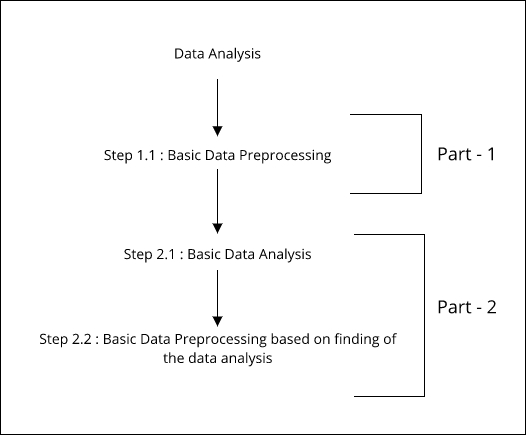

# 2.1. Basic Data Analysis

# **Listing statistical properties**

In [ ]:
training_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
training_data.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [ ]:
training_data.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [ ]:
# Number of each category of the target label
training_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
# Which category of the target label is how many percentage.
training_data['SeriousDlqin2yrs'].value_counts()/len(training_data)*100

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

Có đến 93.316% dữ liệu có biến đầu ra được label 0, trong khi chỉ có 6.684% được label 1. Đây là hiện tượng mất cân bằng dữ liệu xảy ra rất thường xuyên trong ML

**Finding missing values**

In [ ]:
training_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

**Replacing missing values**

In [ ]:
# Actual replacement of the missing value using median value.
training_data = training_data.fillna((training_data.median()))
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Correlation**

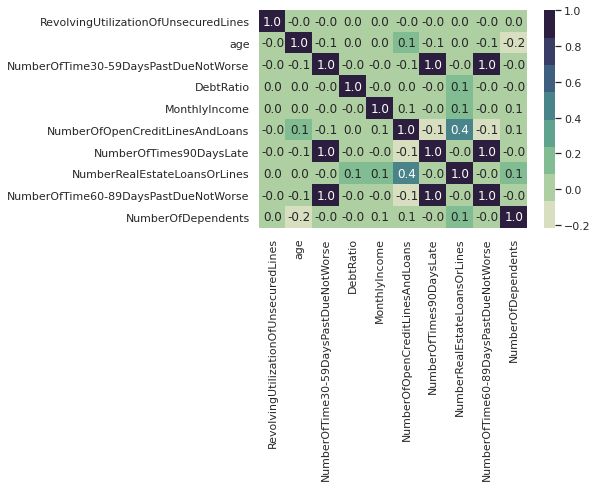

In [ ]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

# **Handle the outliers**

In [ ]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

In [ ]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [ ]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if abs(val - mean)/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [ ]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [ ]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

In [ ]:
def replaceOutlier(col_name, which_part, replace, method = None, min_upper = 0, max_lower = 0):
    if method == 'Percentile-based Outliers':
        min_upper = training_data[col_name][percentile_based_outlier(training_data[col_name])].min()
    elif method == 'MAD-based Outliers':
        min_upper = training_data[col_name][mad_based_outlier(training_data[col_name])].min()
    elif method == 'STD-based Outliers':
        min_upper = training_data[col_name][std_div(training_data[col_name])].min()
    elif method == 'Majority vote based Outliers':
        min_upper = training_data[col_name][outlierVote(training_data[col_name])].min()

    med = training_data[col_name].median()
    if which_part == 'upper':
        if replace == 'median':   
            training_data[col_name] = training_data[col_name].apply(lambda x: med if x > min_upper else x)
        elif replace == 'min_upper':
            training_data[col_name] = training_data[col_name].apply(lambda x: min_upper if x > min_upper else x)
    elif which_part == 'lower':
        if replace == 'median':   
            training_data[col_name] = training_data[col_name].apply(lambda x: med if x < max_lower else x)
        elif replace == 'max_lower':
            training_data[col_name] = training_data[col_name].apply(lambda x: max_lower if x < max_lower else x)


In [ ]:
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Handle outlier of column RevolvingUtilizationOfUnsecuredLines**

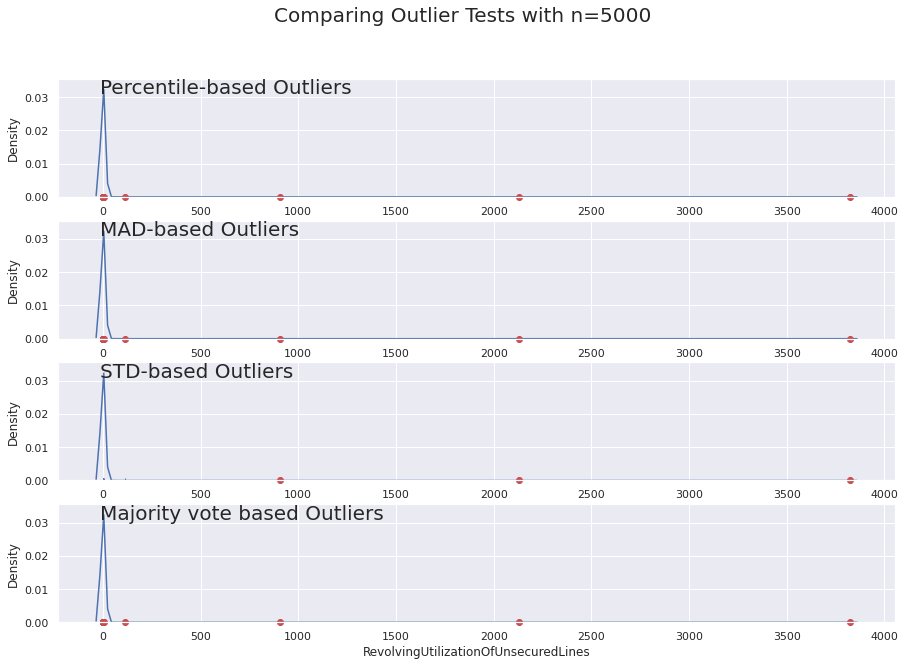

In [ ]:
plotOutlier(training_data['RevolvingUtilizationOfUnsecuredLines'].sample(5000))
plt.show()

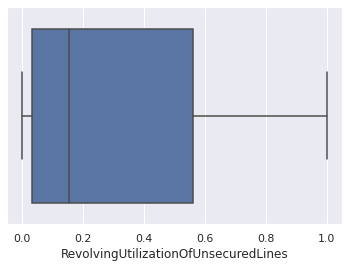

In [ ]:
replaceOutlier(col_name = 'RevolvingUtilizationOfUnsecuredLines', which_part='upper', replace='min_upper', min_upper=0.99999)
sns.boxplot(x=training_data['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

**Handle outlier of column Age**

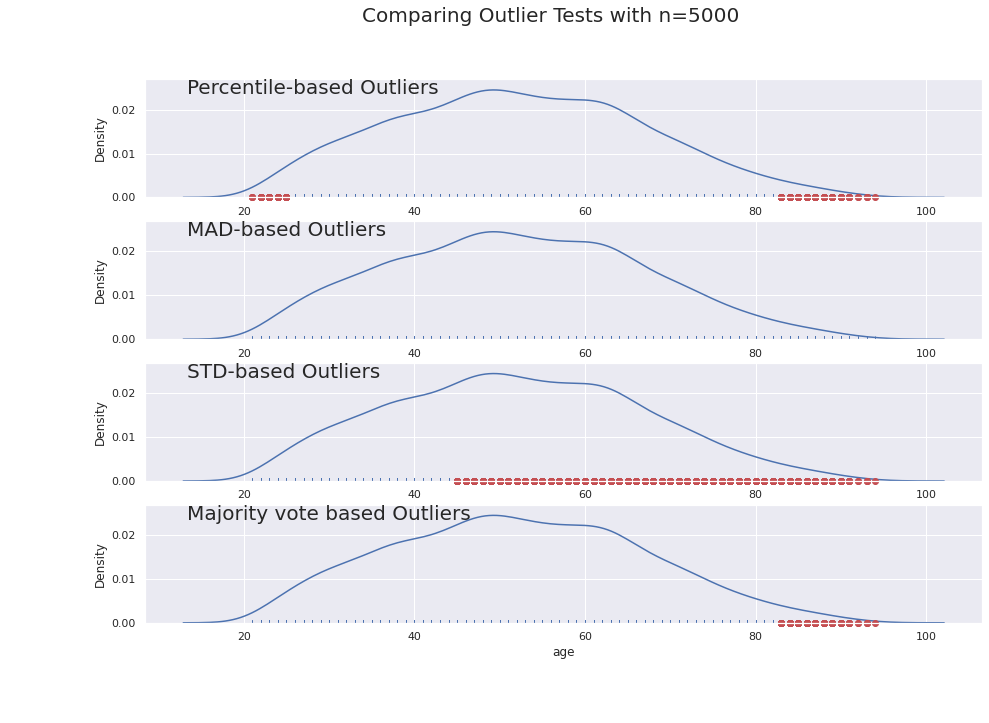

In [ ]:
plotOutlier(training_data['age'].sample(5000))
plt.show()

In [ ]:
import collections
training_data['age'].value_counts()

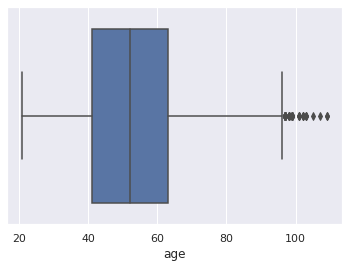

In [ ]:
replaceOutlier(col_name='age', which_part='lower', replace='max_lower', max_lower=21)
sns.boxplot(x=training_data['age'])
plt.show()

**Handle outlier of column NumberOfTime30-59DaysPastDueNotWorse**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


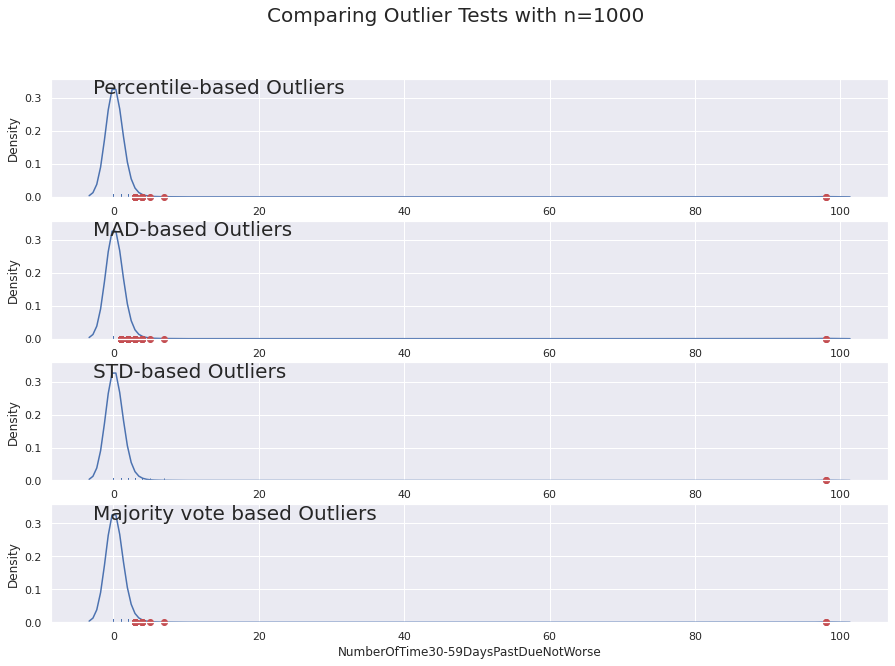

In [ ]:
plotOutlier(training_data['NumberOfTime30-59DaysPastDueNotWorse'].sample(1000))

In [ ]:
training_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

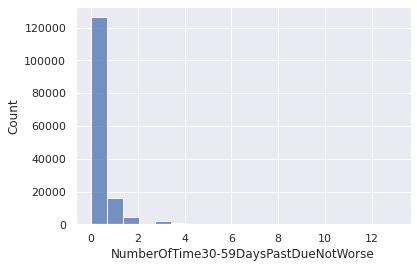

In [ ]:
replaceOutlier('NumberOfTime30-59DaysPastDueNotWorse', which_part='upper', replace='median', min_upper=95)
sns.histplot(x=training_data['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

**Handle outlier of column DebtRatio**

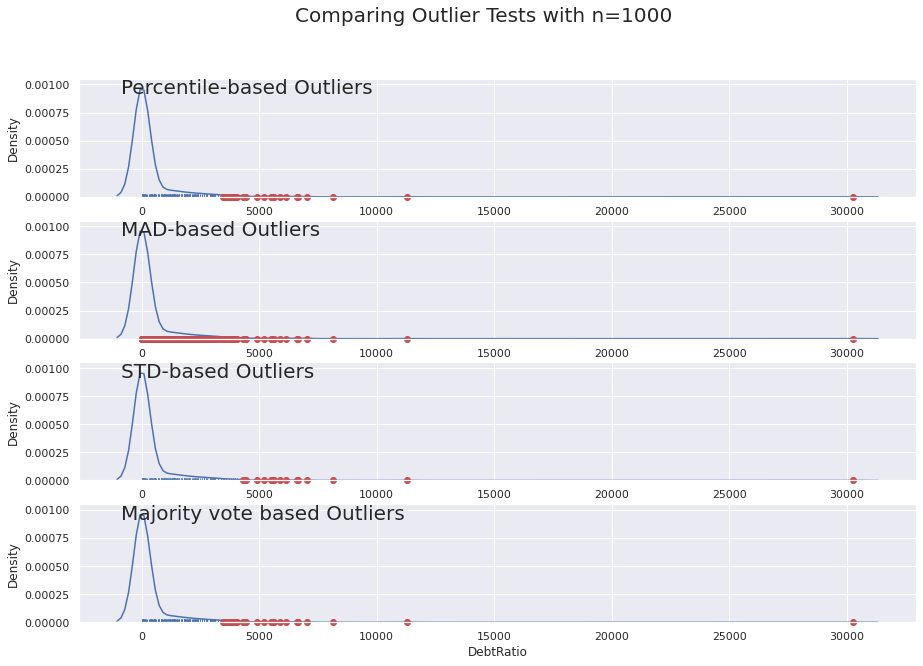

In [ ]:
plotOutlier(training_data['DebtRatio'].sample(1000))

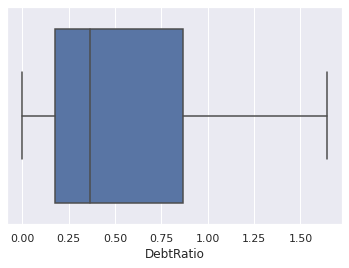

In [ ]:
replaceOutlier(col_name='DebtRatio', which_part='upper', replace='min_upper', method='MAD-based Outliers')
sns.boxplot(x=training_data['DebtRatio'])
plt.show()

**Handle outlier of column MonthlyIncome**

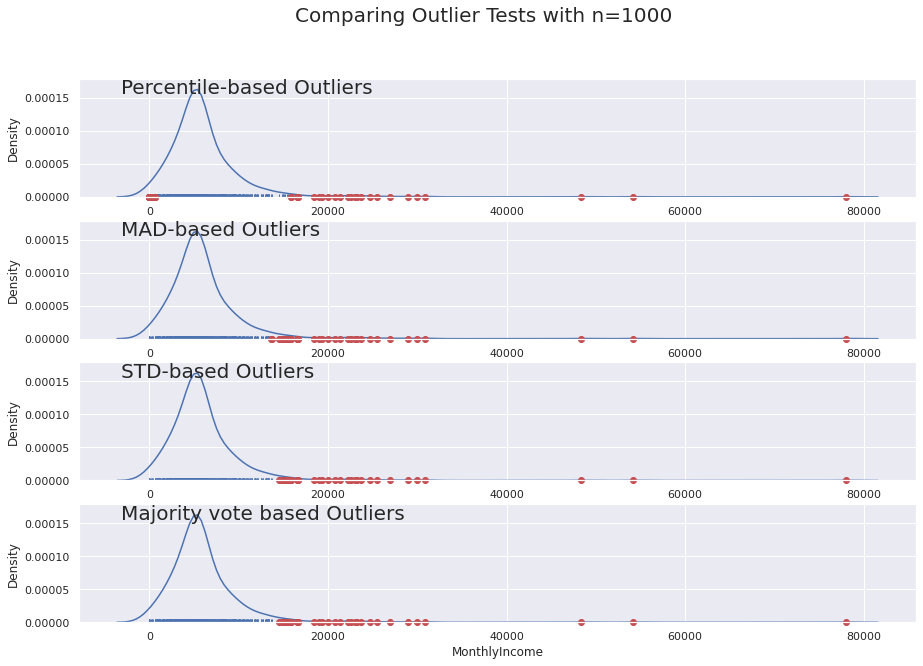

In [ ]:
plotOutlier(training_data['MonthlyIncome'].sample(1000))

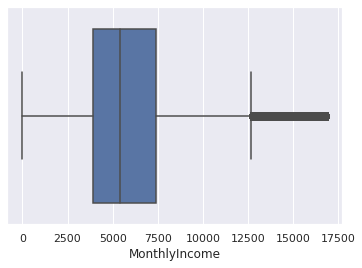

In [ ]:
replaceOutlier(col_name='MonthlyIncome', which_part='upper', replace='min_upper', method='Majority vote based Outliers')
sns.boxplot(x=training_data['MonthlyIncome'])
plt.show()

**Handle outlier of column NumberOfTimes90DaysLate**

In [ ]:
training_data['NumberOfTimes90DaysLate'].value_counts()

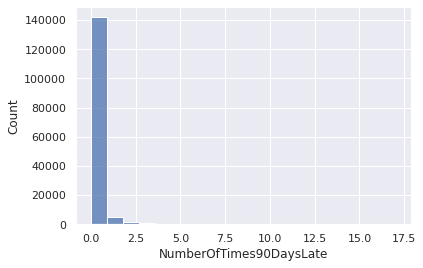

In [ ]:
replaceOutlier(col_name='NumberOfTimes90DaysLate', which_part='upper', replace='median', min_upper=95)
sns.histplot(x=training_data['NumberOfTimes90DaysLate'])
plt.show()

**Handle outlier of column NumberOfTime60-89DaysPastDueNotWorse**

In [ ]:
collections.Counter(training_data['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

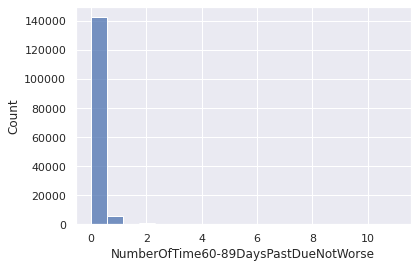

In [ ]:
replaceOutlier(col_name='NumberOfTime60-89DaysPastDueNotWorse', which_part='upper', replace='median', min_upper=95)
sns.histplot(x=training_data['NumberOfTime60-89DaysPastDueNotWorse'])
plt.show()

**Handle outlier of column NumberOfDependents**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


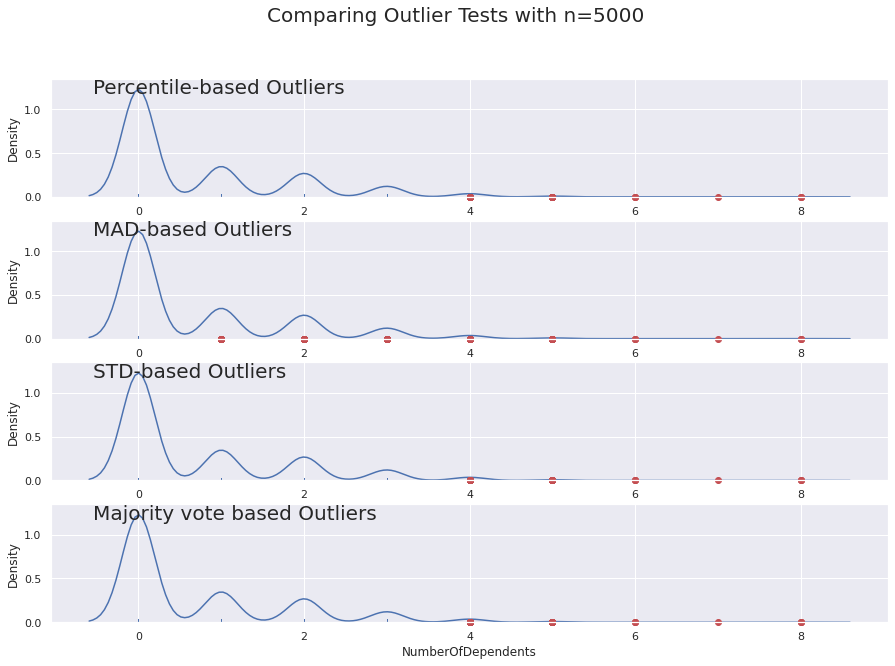

In [ ]:
plotOutlier(training_data['NumberOfDependents'].sample(5000))

In [ ]:
collections.Counter(training_data['NumberOfDependents'])

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

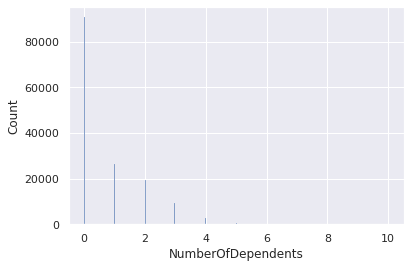

In [ ]:
replaceOutlier(col_name='NumberOfDependents', which_part='upper', replace='min_upper', min_upper=10)
sns.histplot(x=training_data['NumberOfDependents'])
plt.show()

**Handle outlier of column NumberRealEstateLoansOrLines**

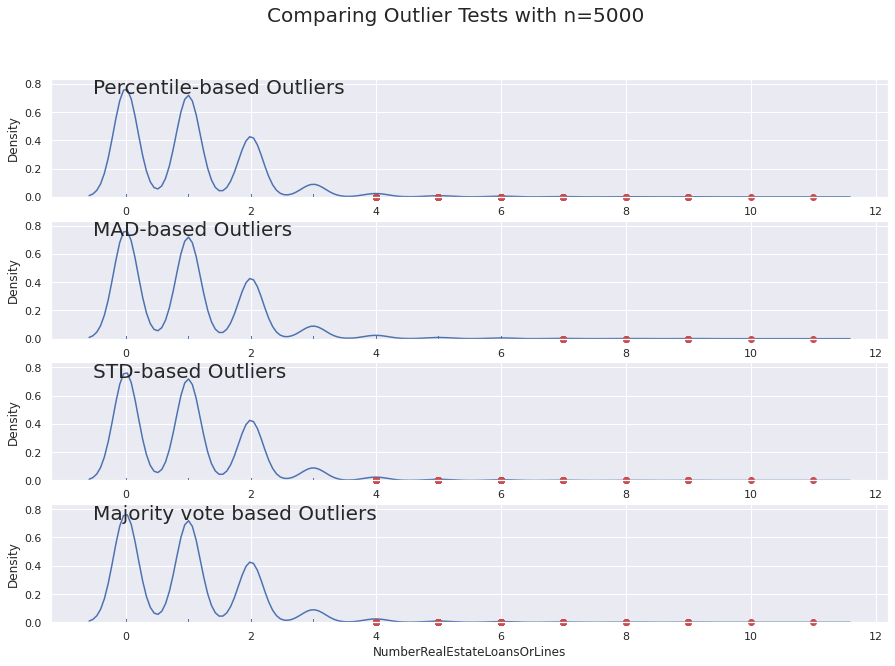

In [ ]:
plotOutlier(training_data['NumberRealEstateLoansOrLines'].sample(5000))

In [ ]:
training_data['NumberRealEstateLoansOrLines'].value_counts()

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

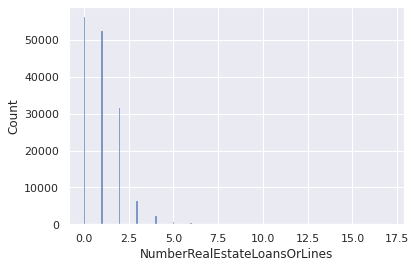

In [ ]:
replaceOutlier(col_name='NumberRealEstateLoansOrLines', which_part='upper', replace='min_upper', min_upper=17)
sns.histplot(x=training_data['NumberRealEstateLoansOrLines'])
plt.show()

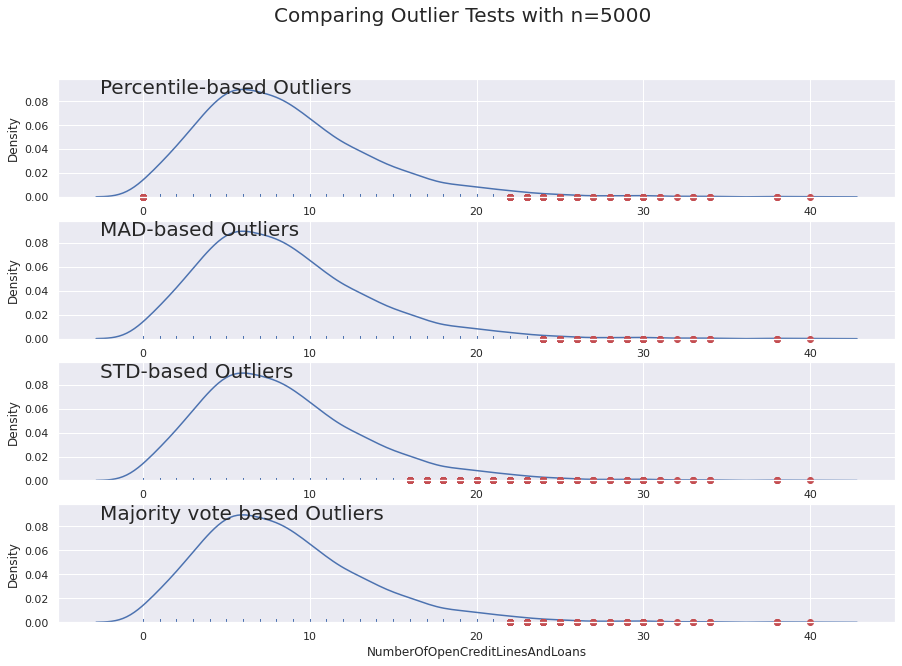

In [ ]:
plotOutlier(training_data['NumberOfOpenCreditLinesAndLoans'].sample(5000))

# Train and build baseline model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
X = training_data.drop('SeriousDlqin2yrs', axis=1)
y = training_data['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
knMod = KNeighborsClassifier()
knMod.fit(X_train, y_train)

test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels , average='macro', sample_weight=None)

0.594774115491252

In [ ]:
glmMod = LogisticRegression()
glmMod.fit(X_train, y_train)
test_labels = glmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels , average='macro', sample_weight=None)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8288454965052916

In [ ]:
adaMod = AdaBoostClassifier()
adaMod.fit(X_train, y_train)

test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels , average='macro', sample_weight=None)

0.8586141220393186

In [ ]:
gbMod = GradientBoostingClassifier()
gbMod.fit(X_train, y_train)
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels , average='macro', sample_weight=None)

0.8624674123195872

In [ ]:
rfMod = RandomForestClassifier()
rfMod.fit(X_train, y_train)
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8356108440727963

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train, y_train, cv=5, verbose=0):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [ ]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], X_train=scaled_X, y_train=y, scr='roc_auc')
cvD

{'AdaBoostClassifier': [0.8577640140817652, 0.002885667205222758],
 'GradientBoostingClassifier': [0.8630040162702486, 0.002837774364101399],
 'KNeighborsClassifier': [0.7402053329761268, 0.004242725378463194],
 'LogisticRegression': [0.8495065080889528, 0.0035410760797689573],
 'RandomForestClassifier': [0.8359610307717826, 0.0027684273198106926]}

# Hyper parameter optimization using GridsearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

**GradientBoosting**

In [ ]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': [10, 100, 200],
                 'max_depth': [2, 4, 8]}

In [ ]:
gridSearchGB = GridSearchCV(estimator=gbMod, param_grid=gbHyperParams,
                                   scoring='roc_auc', verbose=2).fit(scaled_X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] loss=deviance, max_depth=2, n_estimators=10 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... loss=deviance, max_depth=2, n_estimators=10, total=   1.7s
[CV] loss=deviance, max_depth=2, n_estimators=10 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ...... loss=deviance, max_depth=2, n_estimators=10, total=   1.7s
[CV] loss=deviance, max_depth=2, n_estimators=10 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=10, total=   1.7s
[CV] loss=deviance, max_depth=2, n_estimators=10 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=10, total=   1.7s
[CV] loss=deviance, max_depth=2, n_estimators=10 .....................
[CV] ...... loss=deviance, max_depth=2, n_estimators=10, total=   1.7s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV] ..... loss=deviance, max_depth=2, n_estimators=100, total=  16.6s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV] ..... loss=deviance, max_depth=2, n_estimators=100, total=  16.4s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV] ..... loss=deviance, max_depth=2, n_estimators=100, total=  16.4s
[CV] loss=deviance, max_depth=2, n_estimators=100 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 55.4min finished


In [ ]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 100},
 0.8643380256340485)

**Train models with help of new hyper parameter**

In [ ]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(scaled_X, y)
cvDictbestpara = cvDictGen(functions=[bestGbModFitted], X_train=scaled_X, y_train=y, scr='roc_auc')
cvDictbestpara

{'GradientBoostingClassifier': [0.8643344520630661, 0.0028874873537681205]}

**ROC curve and find the optimal point**

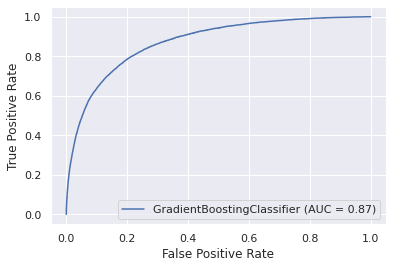

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(bestGbModFitted, scaled_X, y)  

In [ ]:
from sklearn.metrics import roc_curve, classification_report
fpr, tpr, thresholds = roc_curve(y, bestGbModFitted.predict_proba(scaled_X)[:, 1])
optimal_point = thresholds[np.argmax(tpr - fpr)]
optimal_point

0.0667302522184617

**Plot the confusion matrix and classification report**

In [ ]:
def classify(prob):
    if prob > optimal_point:
        return 1
    return 0
y_pred = np.array([classify(prob) for prob in bestGbModFitted.predict_proba(scaled_X)[:, 1]])
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
! pip install -q scikit-plot

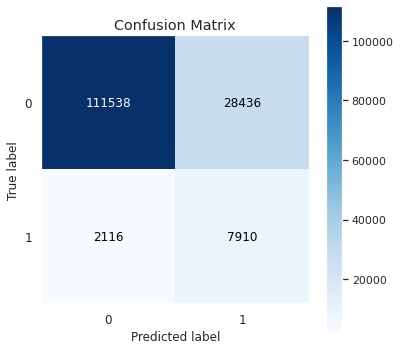

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred, figsize=(6,6))

In [ ]:
print('\n*Classification Report:\n', classification_report(y, y_pred))


*Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88    139974
           1       0.22      0.79      0.34     10026

    accuracy                           0.80    150000
   macro avg       0.60      0.79      0.61    150000
weighted avg       0.93      0.80      0.84    150000



# Demo Webapp

In [ ]:
!pip install streamlit
!pip install -q streamlit_ace
!pip install pyngrok

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import StandardScaler
 
# loading the trained model
model = pickle.load(open('XGBoost_model.pkl', 'rb'))
cleaned_X = pd.read_csv('prepared_X.csv')
scaler = StandardScaler()
scaled_X = scaler.fit_transform(cleaned_X)
optimal_point = 0.0667

In [2]:
%%writefile app.py
 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import StandardScaler
 
# loading the trained model
model = pickle.load(open('XGBoost_model.pkl', 'rb'))
cleaned_X = pd.read_csv('prepared_X.csv')
scaler = StandardScaler()
scaled_X = scaler.fit_transform(cleaned_X)
optimal_point = 0.0667

def prediction(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime3059DaysPastDueNotWorse, DebtRatio,
               MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines,
               NumberOfTime6089DaysPastDueNotWorse, NumberOfDependents):   

    input = np.array([[RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime3059DaysPastDueNotWorse, DebtRatio,
                      MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines,
                      NumberOfTime6089DaysPastDueNotWorse, NumberOfDependents]])

    # Scaler
    scaled_input = scaler.transform(input)
 
    # Making predictions 
    prob = model.predict_proba(scaled_input)[0][1]

    if prob > optimal_point:
        pred = 'The probability that this customer will experience financial distress in the next two years is ' + str(round(prob, 2)) + '. The result is Rejected'
    else:
        pred = 'The probability that this customer will experience financial distress in the next two years is ' + str(round(prob, 2)) + '. The result is Approved'
    return pred


# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Loan Approval ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    RevolvingUtilizationOfUnsecuredLines = st.sidebar.slider("RevolvingUtilizationOfUnsecuredLines", 0.0, 1.0)
    age = st.sidebar.slider("age", 21, 109)
    NumberOfTime3059DaysPastDueNotWorse = st.sidebar.slider("NumberOfTime3059DaysPastDueNotWorse", 0, 13)
    DebtRatio = st.sidebar.slider("DebtRatio", 0.0, 1.7)
    MonthlyIncome = st.sidebar.slider("MonthlyIncome", 0, 17500)
    NumberOfOpenCreditLinesAndLoans = st.sidebar.slider("NumberOfOpenCreditLinesAndLoans", 0, 50)
    NumberOfTimes90DaysLate = st.sidebar.slider("NumberOfTimes90DaysLate", 0, 17)
    NumberRealEstateLoansOrLines = st.sidebar.slider("NumberRealEstateLoansOrLines", 0, 17)
    NumberOfTime6089DaysPastDueNotWorse = st.sidebar.slider("NumberOfTime6089DaysPastDueNotWorse", 0, 11)
    NumberOfDependents = st.sidebar.slider("NumberOfDependents", 0, 10)
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime3059DaysPastDueNotWorse, DebtRatio,
               MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines,
               NumberOfTime6089DaysPastDueNotWorse, NumberOfDependents) 
        st.success(result)

if __name__ == '__main__':
	  main()

Writing app.py


In [3]:
!streamlit run app.py &>/dev/null&

In [4]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

2021-07-06 07:39:20.486 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-d91a14bd-8b67-49b5-8614-d3c2e29b18ca


2021-07-06 07:39:21.973 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:21+0000 lvl=info msg="no configuration paths supplied"
2021-07-06 07:39:21.982 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:21+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-07-06 07:39:21.988 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:21+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-07-06 07:39:21.991 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:21+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-07-06 07:39:22.135 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:22+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-07-06 07:39:22.140 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:22+0000 lvl=info msg="client session established" obj=csess id=1a9344c2fe21
2021-07-06 07:39:22.164 INFO    pyngrok.process.ngrok: t=2021-07-06T07:39:22+0000 lvl=info msg=start pg=/api/tunnel

<NgrokTunnel: "http://6ead8548f0eb.ngrok.io" -> "http://localhost:8501">